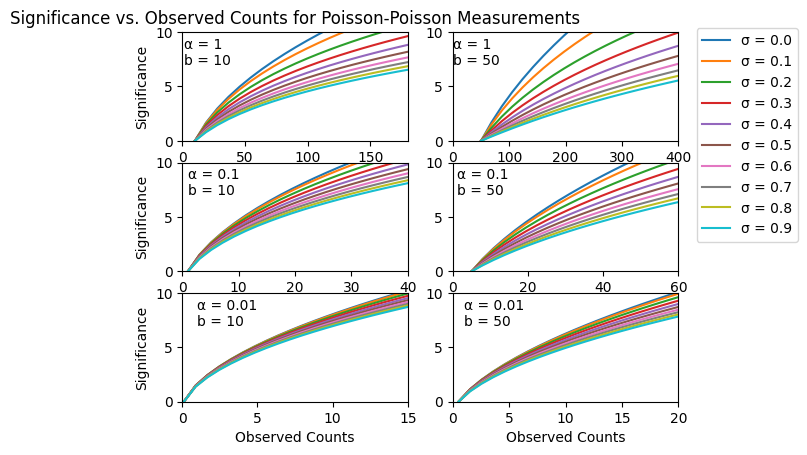

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from gv_significance import poisson_poisson

# Figure 2, Vianello 2018
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

#Define dataset and axes for each subplot
x1 = np.linspace(10, 180, 20)
x2 = np.linspace(50, 400, 20)
x3 = np.linspace(1, 40, 20)
x4 = np.linspace(5, 60, 20)
x5 = np.linspace(0.1, 15, 20)
x6 = np.linspace(0.5, 20, 20)

ax1.axis([0, 180, 0, 10])
ax2.axis([0, 400, 0, 10])
ax3.axis([0, 40, 0, 10])
ax4.axis([0, 60, 0, 10])
ax5.axis([0, 15, 0, 10])
ax6.axis([0, 20, 0, 10])

ax5.set_xlabel('Observed Counts')
ax6.set_xlabel('Observed Counts')
ax1.set_ylabel('Significance')
ax3.set_ylabel('Significance')
ax5.set_ylabel('Significance')

ax1.set_title('Significance vs. Observed Counts for Poisson-Poisson Measurements')

ax1.text(1, 7, "α = 1\nb = 10", fontsize=10)
ax2.text(1, 7, "α = 1\nb = 50", fontsize=10)
ax3.text(1, 7, "α = 0.1\nb = 10", fontsize=10)
ax4.text(1, 7, "α = 0.1\nb = 50", fontsize=10)
ax5.text(1, 7, "α = 0.01\nb = 10", fontsize=10)
ax6.text(1, 7, "α = 0.01\nb = 50", fontsize=10)


#Compute data for each plot
for i in range(0, 10):
    ax1.plot(x1, np.array([poisson_poisson.significance(n, 10, 1, sigma=i*0.1) for n in x1]), label=('σ = %.1f' % (i*0.1)))

for i in range(0, 10):
    ax2.plot(x2, np.array([poisson_poisson.significance(n, 50, 1, sigma=i*0.1) for n in x2]), label=('σ = %.1f' % (i*0.1)))

for i in range(0, 10):
    ax3.plot(x3, np.array([poisson_poisson.significance(n, 10, 0.1, sigma=i*0.1) for n in x3]), label=('σ = %.1f' % (i*0.1)))

for i in range(0, 10):
    ax4.plot(x4, np.array([poisson_poisson.significance(n, 50, 0.1, sigma=i*0.1) for n in x4]), label=('σ = %.1f' % (i*0.1)))

for i in range(0, 10):
    ax5.plot(x5, np.array([poisson_poisson.significance(n, 10, 0.01, sigma=i*0.1) for n in x5]), label=('σ = %.1f' % (i*0.1)))

for i in range(0, 10):
    ax6.plot(x6, np.array([poisson_poisson.significance(n, 50, 0.01, sigma=i*0.1) for n in x6]), label=('σ = %.1f' % (i*0.1)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 3.5))
plt.show()

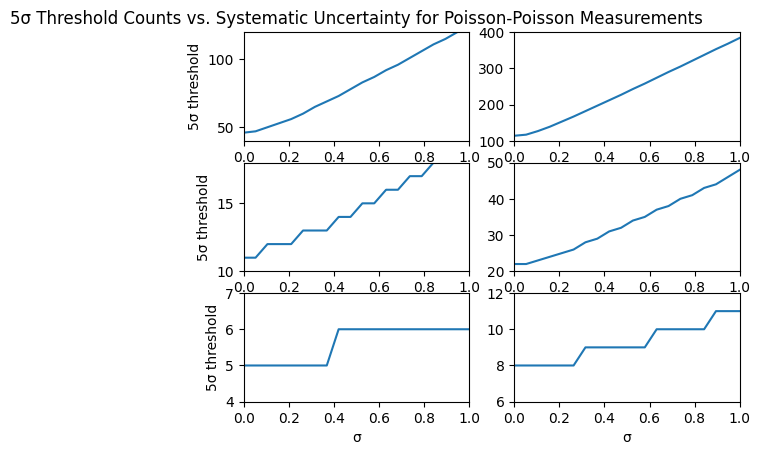

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from gv_significance import poisson_poisson

def uncertain_five_sigma_threshold(b, alpha, sigma):
    if sigma <= 0:
        i = np.ceil(b * alpha)
        while True:
            if poisson_poisson.significance(i, b, alpha, sigma=0) >= 5:
                return i
            i += 1
            
    i = uncertain_five_sigma_threshold(b, alpha, sigma - 0.1)
    while True:
        if poisson_poisson.significance(i, b, alpha, sigma=sigma) >= 5:
            return i
        i += 1

# Figure 3, Vianello 2018
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)

#Define dataset and axes for each subplot
x = np.linspace(0, 1, 20)

ax1.axis([0, 1, 40, 120])
ax2.axis([0, 1, 100, 400])
ax3.axis([0, 1, 10, 18])
ax4.axis([0, 1, 20, 50])
ax5.axis([0, 1, 4, 7])
ax6.axis([0, 1, 6, 12])

ax5.set_xlabel('σ')
ax6.set_xlabel('σ')
ax1.set_ylabel('5σ threshold')
ax3.set_ylabel('5σ threshold')
ax5.set_ylabel('5σ threshold')

ax1.set_title('5σ Threshold Counts vs. Systematic Uncertainty for Poisson-Poisson Measurements')

#Compute data for each plot
ax1.plot(x, np.array([uncertain_five_sigma_threshold(10, 1, sigma) for sigma in x]))
ax2.plot(x, np.array([uncertain_five_sigma_threshold(50, 1, sigma) for sigma in x]))
ax3.plot(x, np.array([uncertain_five_sigma_threshold(10, 0.1, sigma) for sigma in x]))
ax4.plot(x, np.array([uncertain_five_sigma_threshold(50, 0.1, sigma) for sigma in x]))
ax5.plot(x, np.array([uncertain_five_sigma_threshold(10, 0.01, sigma) for sigma in x]))
ax6.plot(x, np.array([uncertain_five_sigma_threshold(50, 0.01, sigma) for sigma in x]))

plt.show()

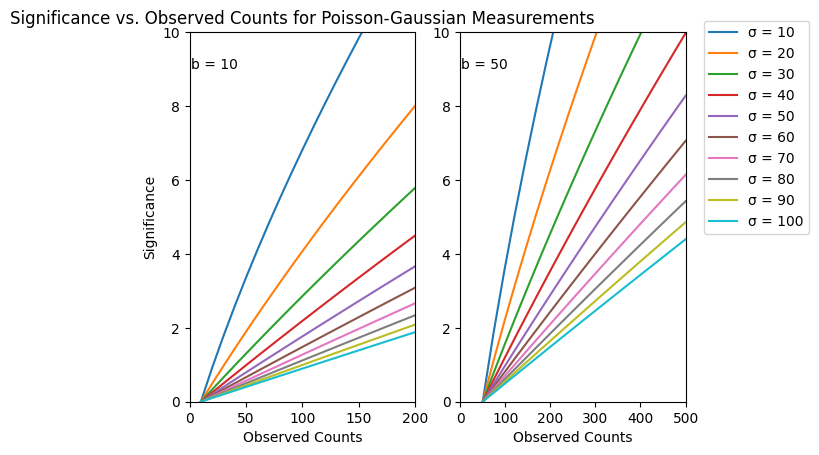

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from gv_significance import poisson_gaussian

# Modified figure 2 for Gaussian background, Vianello 2018
fig, (ax1, ax2) = plt.subplots(1, 2)

#Define dataset and axes for each subplot
x1 = np.linspace(10, 200, 20)
x2 = np.linspace(50, 500, 20)

ax1.axis([0, 200, 0, 10])
ax2.axis([0, 500, 0, 10])

ax1.set_xlabel('Observed Counts')
ax2.set_xlabel('Observed Counts')
ax1.set_ylabel('Significance')

ax1.set_title('Significance vs. Observed Counts for Poisson-Gaussian Measurements')

ax1.text(1, 9, "b = 10", fontsize=10)
ax2.text(1, 9, "b = 50", fontsize=10)

#Compute data for each plot
for i in range(1, 11):
    ax1.plot(x1, np.array([poisson_gaussian.significance(n, 10, i*10) for n in x1]), label=('σ = %i' % (i*10)))

for i in range(1, 11):
    ax2.plot(x2, np.array([poisson_gaussian.significance(n, 50, i*10) for n in x2]), label=('σ = %i' % (i*10)))

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))
plt.show()

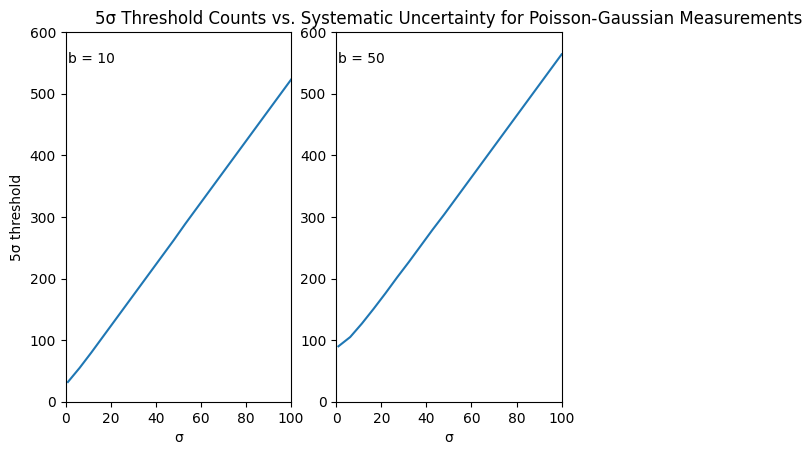

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from gv_significance import poisson_gaussian

def g_uncertain_five_sigma_threshold(b, sigma):
    if sigma <= 0:
        return b + 1
            
    i = g_uncertain_five_sigma_threshold(b, sigma - 1)
    while True:
        if poisson_gaussian.significance(i, b, sigma) >= 5:
            return i
        i += 1

# Figure 3, Vianello 2018
fig, (ax1, ax2) = plt.subplots(1, 2)

#Define dataset and axes for each subplot
x = np.linspace(1, 100, 20)

ax1.axis([0, 100, 0, 600])
ax2.axis([0, 100, 0, 600])

ax1.set_xlabel('σ')
ax2.set_xlabel('σ')
ax1.set_ylabel('5σ threshold')

plt.title('5σ Threshold Counts vs. Systematic Uncertainty for Poisson-Gaussian Measurements')

ax1.text(1, 550, "b = 10", fontsize=10)
ax2.text(1, 550, "b = 50", fontsize=10)

#Compute data for each plot
ax1.plot(x, np.array([g_uncertain_five_sigma_threshold(10, sigma) for sigma in x]))
ax2.plot(x, np.array([g_uncertain_five_sigma_threshold(50, sigma) for sigma in x]))

plt.show()